# Analysing potential markets to invest in

It is our passion to empower people digitally. We believe, if people can master the basics of programming they can work on their passions (eye catching animated movies, jaw dropping games, insightful and good-feeling educational programs and whatever more one can imagine ).  
We do that by empowering people with coding skills in multiple areas like web & mobile development, game development, data sceince, analytics etc.

We are a relatively new company with big dreams but a small budget. Therefore, the goal of this project is to find those who needs us the most. We will run basic statistical analysis in this project to find out two market segments that are filled with enthusiasts who are eager to learn with the ability to afford it at the same time.

## Dataset: freeCodeCamp's 2017 New Coder Survey

The survey was undertaken by freeCodeCamp which contains data about different topics people are interested to learn. This is an ideal dataset because it is relatively new and contains a wide array of choices to consider from.

In [1]:
import pandas as pd

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
print("No. of rows and columns:" + str(survey.shape))
survey.head()

No. of rows and columns:(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about the population of new coders that are interested in the subjects we teach. We'd like to know:

1. Where are these new coders located?
2. What are the locations with the greatest number of new coders?
3. How much money new coders are willing to spend on learning?

In [2]:
survey["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                  

The data indicates that there are a lot of people with multiple interested areas. It would be appropriate to map out the number of people with multiple interests and how many different interests they may have. 

In [3]:
valid_data = survey["JobRoleInterest"].dropna()
No_of_interests = valid_data.str.count(",") + 1
No_of_interests.value_counts(normalize = True) * 100


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Atleast 30% of the market is interested in 3 to 4 topics which is a significant ratio and should not be ignored. Since, our main focus is on the web and mobile development courses, it would be better to figure out how many people are interested in at least one of these courses.

In [4]:
freq = valid_data.str.contains(
                               "Mobile Developer | Web Developer")

In [5]:
freq_table = freq.value_counts(normalize = True) * 100

In [6]:
freq_table

True     82.608696
False    17.391304
Name: JobRoleInterest, dtype: float64

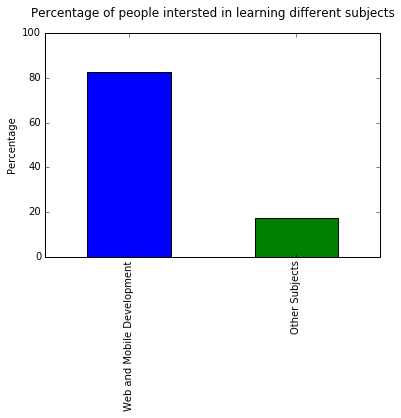

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

freq_table.plot.bar()
plt.ylabel("Percentage")
plt.ylim([0,100])
plt.xticks([0,1], ["Web and Mobile Development", "Other Subjects"])
plt.title("Percentage of people intersted in learning different subjects", 
         y = 1.05)
plt.show()

The chart and the analysis shows that more than 80% of people are interested in either learning web or mobile development. This is a good indication and confirms that sample is relevant to our population analysis. However, this is still a sample data and actual representation could be higher or lower and this fact must always be accounted before making any decision.

## Figuring out the right market

We have established that the sample is worth exploring further. Next, we must figure out which market can give us the highest revenue potential. Therefore, let's investigate where do most of the respondents live.

In [8]:
market_data = survey[~pd.isnull(survey["JobRoleInterest"])]

In [9]:
customer_freq_loc_abs = market_data["CountryLive"].value_counts()
customer_freq_loc_abs

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

In [10]:
customer_freq_loc_rel = market_data["CountryLive"].value_counts(
    normalize = True) * 100
customer_freq_loc_rel

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

According to the data, the two markets with most people intersted to learn are United States and India. Assuming a conversion rate of 10%, it would be more beneficial to run ads in these two countries as they are likely to yield most sales. However, at this point we are unsure about how much on average customers in these countries are willing to pay. Understanding this might be even more important because the 3rd and 4th potential market i.e. the U.K. and Canada are not far from India in terms of number of interested customers, but if they are willing to pay higher than Indian customers then business might be more profitable targeting those market segments.

## Figuring out how much students spend on the courses

Since we established that most of the people interested in learning are from United States, India, Canada and U.K. It would be beneficial to limit our investigation to only these countries. In addition, all of our courses are written in English which is an official language of all these countries thus, it is an added bonus.

In [11]:
countries = ["United States of America", "India", "United Kingdom", "Canada"]
db = market_data[market_data["CountryLive"].isin(countries)].copy()
db["CountryLive"].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

Need to figure out the amount of money students have spent each month on learning.

In [12]:
db["MonthsProgramming"].value_counts().sort_index()

0.0      150
1.0      480
2.0      401
3.0      380
4.0      209
5.0      156
6.0      397
7.0       72
8.0      132
9.0       70
10.0      83
11.0      25
12.0     386
13.0      22
14.0      49
15.0      45
16.0      36
17.0      16
18.0      92
19.0       5
20.0      53
21.0       5
22.0       2
23.0       1
24.0     267
25.0       7
26.0       8
27.0       4
28.0       9
29.0       4
        ... 
55.0       3
58.0       1
59.0       2
60.0      47
70.0       2
72.0      19
73.0       1
80.0       1
83.0       1
84.0       4
89.0       1
96.0       3
100.0      4
108.0      2
111.0      1
113.0      1
120.0      8
144.0      4
156.0      1
171.0      1
180.0      1
190.0      1
198.0      1
200.0      4
240.0      2
300.0      1
360.0      3
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 80, dtype: int64

In [13]:
# here about 150 people have entered 0 in their learning number of months which 
# could mean they have just started; however, it will cause an error
# in division, therefore changing them to 1.
def zero_to_one(x):
    if x == 0:
        return 1
    return x

#db["MonthsProgramming"] = db["MonthsProgramming"].apply(lambda x : 1 if (x == 0))
db["MonthsProgramming"] = db["MonthsProgramming"].apply(zero_to_one)
db["MonthsProgramming"].value_counts().sort_index()

1.0      630
2.0      401
3.0      380
4.0      209
5.0      156
6.0      397
7.0       72
8.0      132
9.0       70
10.0      83
11.0      25
12.0     386
13.0      22
14.0      49
15.0      45
16.0      36
17.0      16
18.0      92
19.0       5
20.0      53
21.0       5
22.0       2
23.0       1
24.0     267
25.0       7
26.0       8
27.0       4
28.0       9
29.0       4
30.0      44
        ... 
55.0       3
58.0       1
59.0       2
60.0      47
70.0       2
72.0      19
73.0       1
80.0       1
83.0       1
84.0       4
89.0       1
96.0       3
100.0      4
108.0      2
111.0      1
113.0      1
120.0      8
144.0      4
156.0      1
171.0      1
180.0      1
190.0      1
198.0      1
200.0      4
240.0      2
300.0      1
360.0      3
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 79, dtype: int64

In [14]:
db["MoneySpentPerMonth"] = db["MoneyForLearning"] / db["MonthsProgramming"]
print("Total number of students: " + str(db.shape[0]))
print("Total number of number of with indeterminate amount of money spent: "
      + str(db["MoneySpentPerMonth"].isna().sum()))
print("No. of students interested in paying: " + 
      str(db["MoneySpentPerMonth"].count()))

Total number of students: 4228
Total number of number of with indeterminate amount of money spent: 313
No. of students interested in paying: 3915


In [15]:
# removing students whose amount spent is indeterminate 
db = db[~pd.isnull(db["MoneySpentPerMonth"])]
db["MoneySpentPerMonth"].value_counts()

0.000000        1844
16.666667         82
50.000000         76
25.000000         74
100.000000        68
8.333333          67
33.333333         64
20.000000         59
12.500000         51
10.000000         48
83.333333         47
166.666667        47
4.166667          38
66.666667         38
5.000000          37
500.000000        32
200.000000        31
250.000000        29
41.666667         28
20.833333         27
2.500000          26
11.111111         26
125.000000        25
3.333333          22
1000.000000       21
5.555556          20
30.000000         19
333.333333        18
75.000000         17
6.666667          16
                ... 
305.555556         1
1080.000000        1
180.000000         1
11.250000          1
2.187500           1
10833.333333       1
115.000000         1
90.000000          1
8.750000           1
111.000000         1
2750.000000        1
140.000000         1
2.416667           1
4166.666667        1
33.250000          1
233.823529         1
4.545455     

In [16]:
grouped_data = db.groupby('CountryLive')
grouped_data.describe()['MoneySpentPerMonth']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


The maximum amount spent by a person for each country is too high which is possibly an error or outlier which may distort the summary statistics. Let's investigate further by calculating the median and mode.

## Median

In [17]:
grouped_data["MoneySpentPerMonth"].median()

CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: MoneySpentPerMonth, dtype: float64

Median shows that an average household except in United States is willing to pay 0$ for courses. Even the number in United States is too low.

## Mode

In [18]:
for country in countries:
    mode = db[db["CountryLive"] == country]["MoneySpentPerMonth"].mode()[0]
    print("Mode amount spent by customers in " + country + ": " + str(mode))

Mode amount spent by customers in United States of America: 0.0
Mode amount spent by customers in India: 0.0
Mode amount spent by customers in United Kingdom: 0.0
Mode amount spent by customers in Canada: 0.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



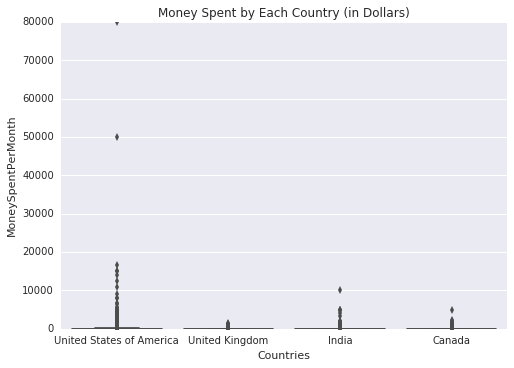

In [19]:
import seaborn as sns

sns.boxplot(x = "CountryLive", y="MoneySpentPerMonth", data= db)
plt.title("Money Spent by Each Country (in Dollars)", fontsize = 12)
plt.xlabel("Countries")
plt.show()

From the plot, it could be easily seen that there are two extreme outlying values in United States. A safe range for genuine values can be 20,000.

In [20]:
db = db[db["MoneySpentPerMonth"] < 20000]

## Reprinting the plots to see the difference

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



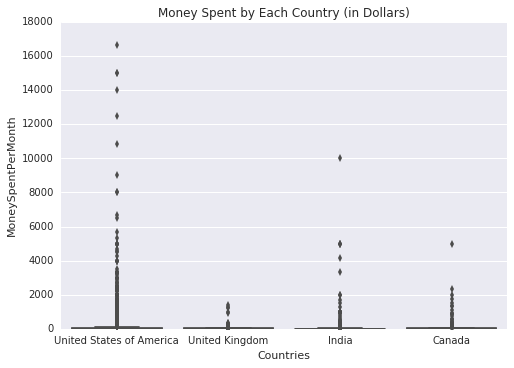

In [21]:
sns.boxplot(x = "CountryLive", y="MoneySpentPerMonth", data= db)
plt.title("Money Spent by Each Country (in Dollars)", fontsize = 12)
plt.xlabel("Countries")
plt.show()

It is surprising to see that people in India are spending more than people in UK and Canada given their GDP per capita, income level, and socio-economic status are lower in comparison. It might be possible that there is an error in data entry where respondents might have perceived the amount to be in their local currency. Therefore, the data must be further filtered.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



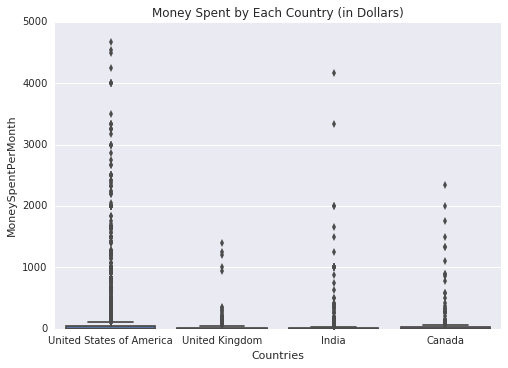

In [22]:
db = db[db["MoneySpentPerMonth"] < 5000]

sns.boxplot(x = "CountryLive", y="MoneySpentPerMonth", data= db)
plt.title("Money Spent by Each Country (in Dollars)", fontsize = 12)
plt.xlabel("Countries")
plt.show()

In [23]:
db.groupby("CountryLive")["MoneySpentPerMonth"].mean()

CountryLive
Canada                       93.065400
India                        81.812102
United Kingdom               45.534443
United States of America    130.639017
Name: MoneySpentPerMonth, dtype: float64

After removing the outliers significantly we have come to a reasonable amount of money spent by each country per person per month. From this it is clear that one of the market should be United States of America.

In [24]:
db["CountryLive"].value_counts()

United States of America    2913
India                        459
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

Second market should be "India" as the average expenditure is above our subscription proce of $59 with higher number of potential customers.